# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

<IPython.core.display.Javascript object>


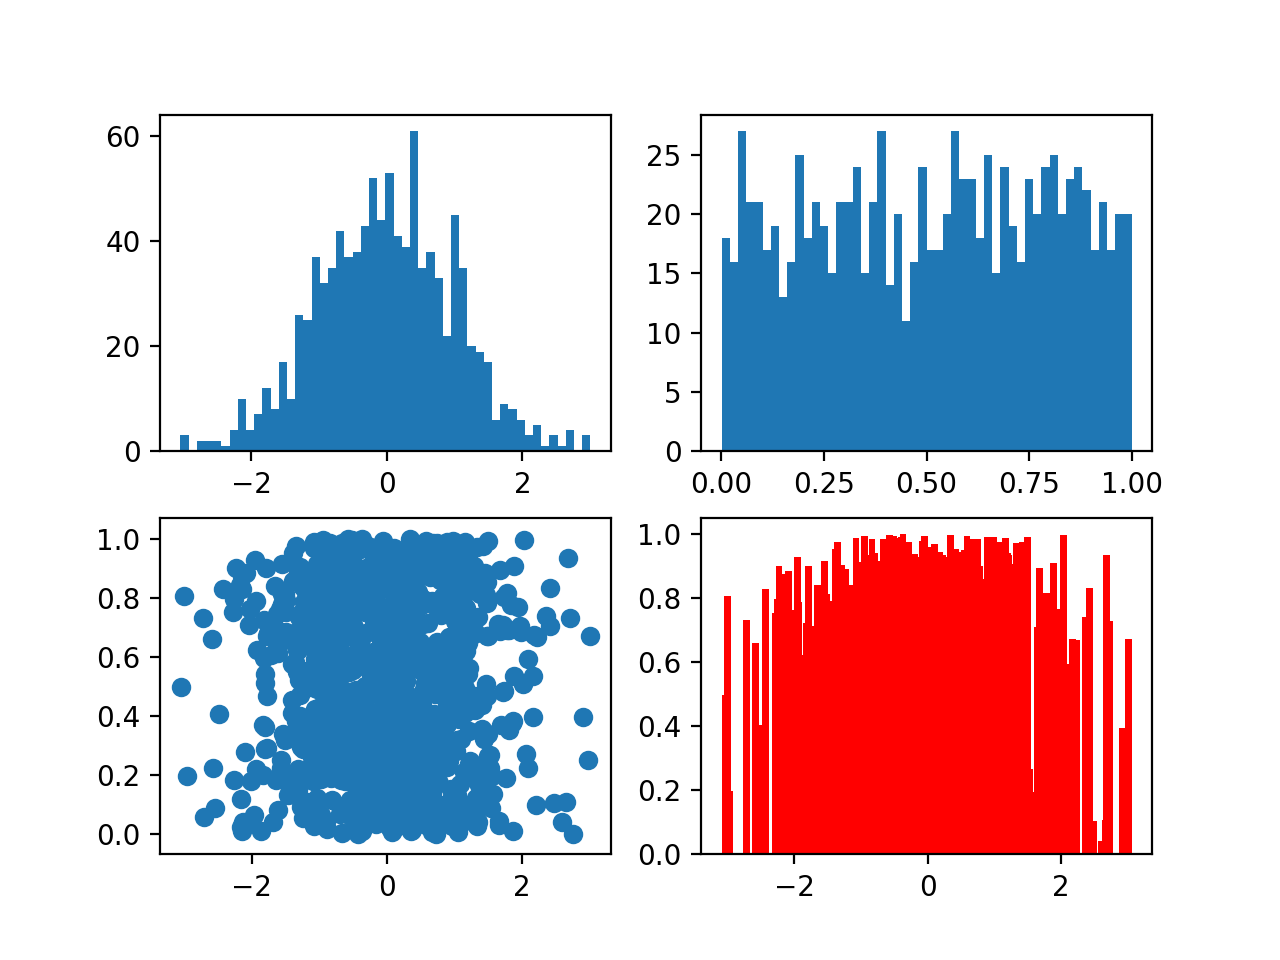

<Container object of 1000 artists>

In [61]:
# sample
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(2, 2)

test1_histogram = plt.subplot(gspec[0,0])
test2_histogram = plt.subplot(gspec[0,1])
test3_histogram = plt.subplot(gspec[1,0])
test4_histogram = plt.subplot(gspec[1,1])

data1 = np.random.normal(loc=0.0, scale=1.0, size=1000)
data2 = np.random.random(size=1000)

test1_histogram.hist(data1, bins = 50)
test2_histogram.hist(data2, bins = 50)
test3_histogram.scatter(data1, data2)
test4_histogram.bar(data1, data2, width = 0.1, color = 'red')


<IPython.core.display.Javascript object>


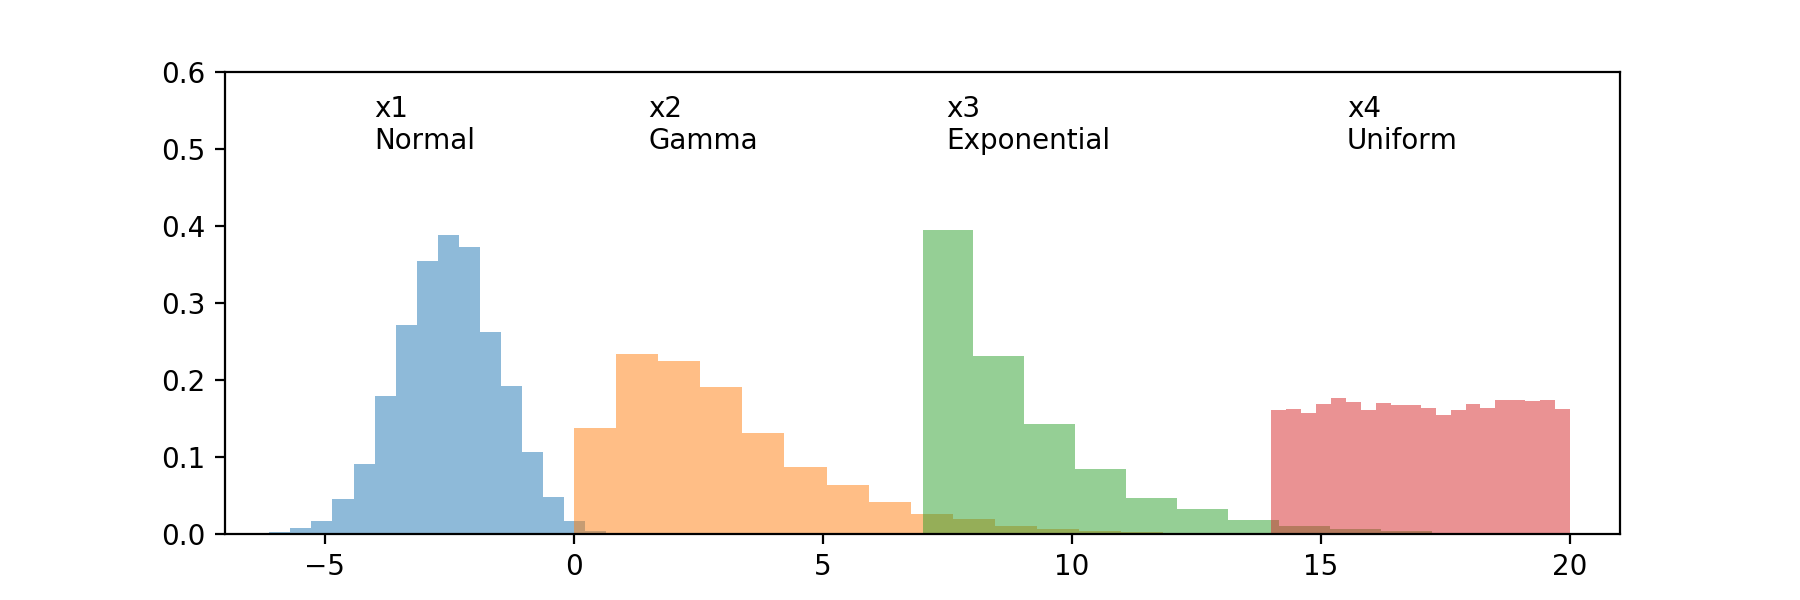

In [6]:
# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


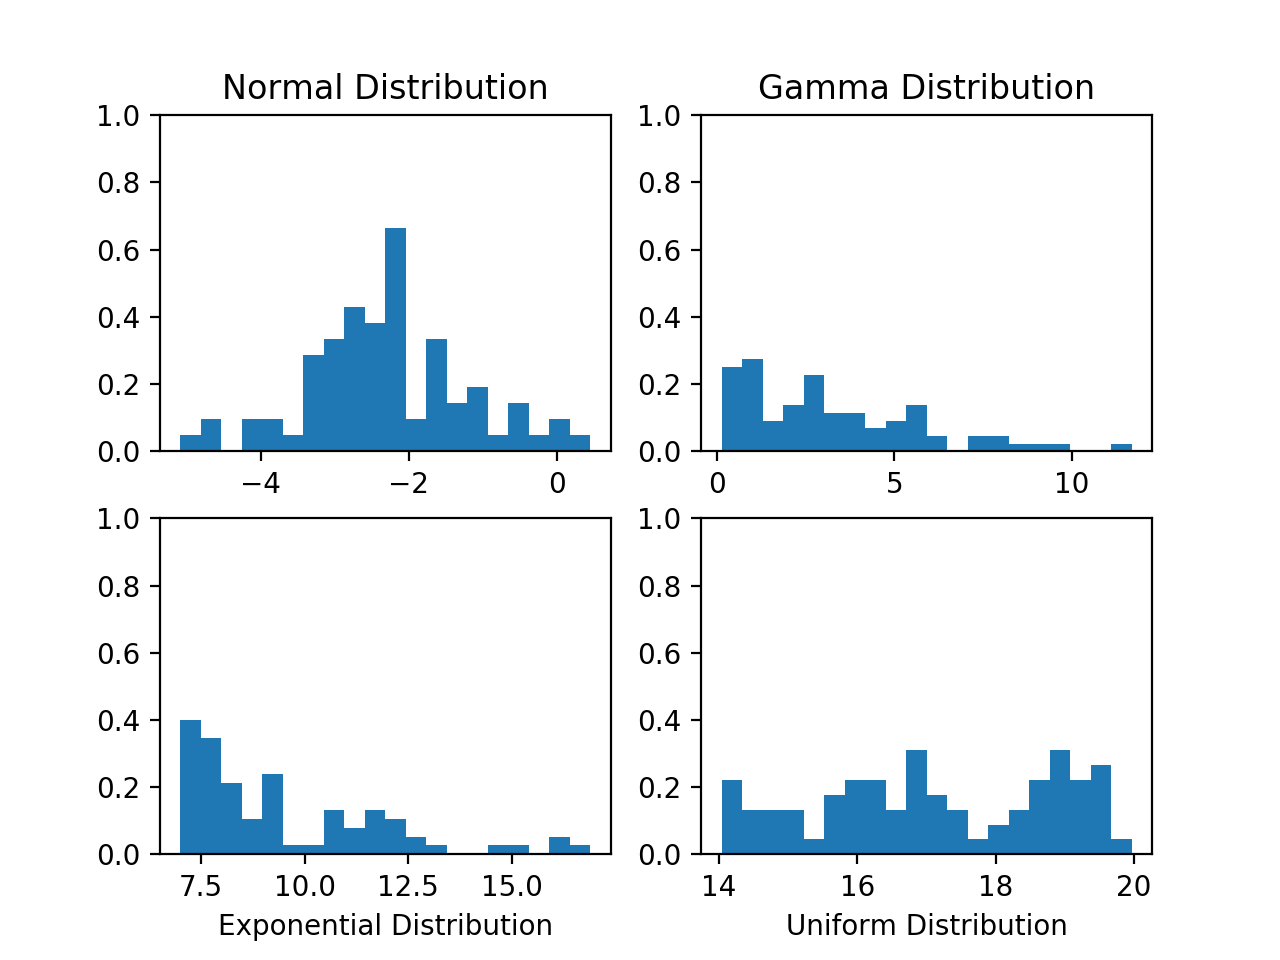

In [87]:
import matplotlib.animation as animation
import numpy as np
import random

fig,((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2)
ax = [axis1,axis2,axis3,axis4]

n = 10000
x = random.randint(100,10000)
def update(curr):
    if curr == n:
        a.event_source.stop()
    for i in range(0, len(ax)):
        ax[i].cla()
    for axe in ax:
        axe.set_ylim([0,1])
    axis1.set_title('Normal Distribution')
    axis2.set_title('Gamma Distribution')
    axis3.set_xlabel('Exponential Distribution')
    axis4.set_xlabel('Uniform Distribution')
    
    axis1.hist(x1[:curr], normed=True, bins = 20)
    axis2.hist(x2[:curr], normed=True, bins = 20)
    axis3.hist(x3[:curr], normed=True, bins =20)
    axis4.hist(x4[:curr], normed=True, bins=20)
    
    ax2.annotate('n = {}'.format(curr), [0,1.0])
    
a = animation.FuncAnimation(fig, update, blit=True)